In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import random

import matplotlib.pyplot as plt
random.seed(25)

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [3]:
x_train_original = pd.read_csv('train_data/x_train.csv', index_col='ID')
y_train_original = pd.read_csv('train_data/y_train.csv', index_col='ID')
train_original = pd.concat([x_train_original, y_train_original], axis=1)
test_original = pd.read_csv('test_data/x_test.csv', index_col='ID')
train_original.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,RET_6,VOLUME_6,RET_7,VOLUME_7,RET_8,VOLUME_8,RET_9,VOLUME_9,RET_10,VOLUME_10,RET_11,VOLUME_11,RET_12,VOLUME_12,RET_13,VOLUME_13,RET_14,VOLUME_14,RET_15,VOLUME_15,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,0.010972,0.033832,-0.014672,-0.362868,0.016483,-0.972920,0.014331,0.590810,-0.017215,0.557246,-0.018433,0.453590,0.134146,8.580442,0.182287,3.427303,0.013570,-0.328418,0.030108,-0.816436,0.027624,-0.244636,-0.049370,-2.042624,-0.028571,-0.369605,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,True
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,0.018826,NaN,-0.025540,NaN,-0.038062,NaN,-0.006873,NaN,-0.026756,NaN,0.023973,NaN,0.158731,NaN,0.045642,NaN,-0.008230,NaN,-0.028000,NaN,-0.019608,NaN,-0.052044,NaN,-0.004073,NaN,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN,True
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,-0.009042,-0.298777,0.024852,-0.157421,0.009354,0.091455,0.027522,-0.405978,-0.023047,-0.389777,-0.002979,-0.701838,-0.006342,-0.229531,0.055803,0.543460,-0.012781,-0.121126,0.028093,-0.187444,-0.009426,-0.081783,-0.002686,-0.356711,-0.007552,-0.336773,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,False
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,-0.004632,-0.639737,-0.019677,-0.940163,0.003544,-0.882464,-0.002021,-0.113951,-0.043962,-0.395345,-0.004329,-0.765754,0.014146,-0.593888,-0.021946,0.588171,0.007693,-0.427358,0.007264,-0.540519,-0.010067,-0.839232,0.000479,-2.144763,0.021057,-0.431029,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,False
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,0.000000,-1.180629,0.000000,-1.313896,0.022321,-1.204398,0.018182,-0.879172,-0.026549,-0.858613,-0.017391,-0.029690,-0.008621,-1.022991,0.022026,-0.387114,-0.008734,-0.288180,-0.004348,-0.115091,-0.041667,0.271702,0.095891,18.894266,-0.026667,0.803608,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,False


In [4]:
ret_cols = ['RET_1',  'RET_2',  'RET_3',  'RET_4', 'RET_5',  'RET_6',  'RET_7', 'RET_8',  'RET_9',  'RET_10', 'RET_11',  'RET_12',  'RET_13', 'RET_14',  'RET_15',  'RET_16', 'RET_17',  'RET_18',  'RET_19', 'RET_20']
volume_cols = ['VOLUME_1','VOLUME_2','VOLUME_3','VOLUME_4','VOLUME_5','VOLUME_6','VOLUME_7','VOLUME_8','VOLUME_9','VOLUME_10','VOLUME_11','VOLUME_12','VOLUME_13','VOLUME_14','VOLUME_15','VOLUME_16','VOLUME_17','VOLUME_18','VOLUME_19','VOLUME_20']

In [8]:
x_train = x_train_original.copy()
x_train.SECTOR.value_counts()
x_train.SUB_INDUSTRY.value_counts()

108    29567
104    17031
141    10238
97     10039
154     9565
       ...  
180       71
21        68
181       60
48        56
18        32
Name: SUB_INDUSTRY, Length: 175, dtype: int64

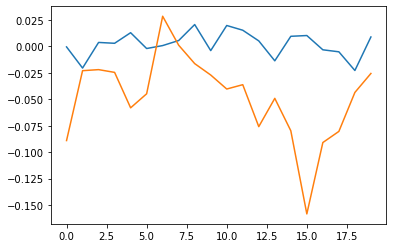

In [9]:
x_train = x_train_original.copy()
ret_yeet = x_train.groupby(["DATE"])[ret_cols].mean()
ret_vals = ret_yeet.iloc[0].values[::-1]

plt.plot(ret_vals)


x_train = x_train_original.copy()
volume_cols_yeet = x_train.groupby(["DATE"])[volume_cols].mean()
volume_cols_vals = volume_cols_yeet.iloc[0].values[::-1]

plt.plot(volume_cols_vals)
# ret_yeet

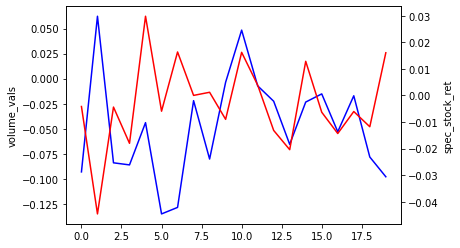

In [10]:
from sklearn import preprocessing as p

min_max_scaler = p.MinMaxScaler()


selected_stock = x_train.loc[(x_train.SECTOR == 0) & (x_train.DATE == 0)].index[0]
selected_stock
  
ret_vals = x_train.groupby(["DATE","SECTOR"])[ret_cols].mean().iloc[selected_stock].values[::-1]
volume_vals = x_train.groupby(["DATE","SECTOR"])[volume_cols].mean().iloc[selected_stock].values[::-1]

spec_stock_ret = x_train.iloc[217][ret_cols].values[::-1]
spec_stock_vols = x_train.iloc[217][volume_cols].values[::-1]



x = list(range(0,len(volume_vals)))


fig, ax_left = plt.subplots()
ax_left.plot(x, volume_vals, label='volume_vals', color='blue')
ax_left.set_ylabel('volume_vals')

# ax_right = ax_left.twinx()
# ax_right.plot(x, ret_vals, label='ret_vals', color='green')
# ax_right.set_ylabel('ret_vals')

ax_righ1 = ax_left.twinx()
ax_righ1.plot(x, spec_stock_ret, label='spec_stock_ret', color='red')
ax_righ1.set_ylabel('spec_stock_ret')


# plt.axvline(x=5)
# plt.axvline(x=10)
# plt.axvline(x=15)
plt.show()



array([[1.        , 0.77671325],
       [0.77671325, 1.        ]])

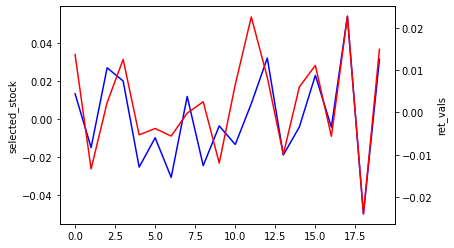

In [75]:
ret_vals = x_train.groupby(["DATE","SECTOR"])[ret_cols].mean().loc[223,6].values
selected_stock = x_train.loc[(x_train.SECTOR == 6) & (x_train.DATE == 223)].index[2]

selected_stock = x_train.iloc[selected_stock][ret_cols].values


x = list(range(0,len(selected_stock)))

fig, ax_left = plt.subplots()
ax_left.plot(x, selected_stock, label='selected_stock', color='blue')
ax_left.set_ylabel('selected_stock')

# ax_right = ax_left.twinx()
# ax_right.plot(x, ret_vals, label='ret_vals', color='green')
# ax_right.set_ylabel('ret_vals')

ax_righ1 = ax_left.twinx()
ax_righ1.plot(x, ret_vals, label='ret_vals', color='red')
ax_righ1.set_ylabel('ret_vals')



np.corrcoef(ret_vals, selected_stock)


array([[1.        , 0.48222162],
       [0.48222162, 1.        ]])

array([[1.        , 0.03571901],
       [0.03571901, 1.        ]])

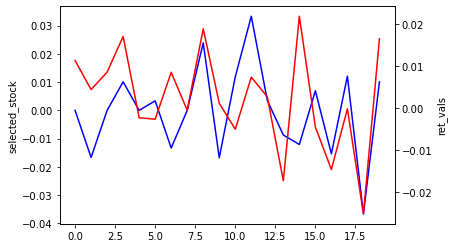

In [11]:
ret_vals = x_train.groupby(["DATE","INDUSTRY"])[ret_cols].mean().loc[223,6].values
in1 = x_train.loc[(x_train.INDUSTRY == 6) & (x_train.DATE == 223)].index[8]



selected_stock = x_train.iloc[in1][ret_cols].values
volumerj3j = x_train.iloc[in1][volume_cols].values


x = list(range(0,len(selected_stock)))

fig, ax_left = plt.subplots()
ax_left.plot(x, selected_stock, label='selected_stock', color='blue')
ax_left.set_ylabel('selected_stock')

# ax_right = ax_left.twinx()
# ax_right.plot(x, ret_vals, label='ret_vals', color='green')
# ax_right.set_ylabel('ret_vals')

ax_righ1 = ax_left.twinx()
ax_righ1.plot(x, ret_vals, label='ret_vals', color='red')
ax_righ1.set_ylabel('ret_vals')



display(np.corrcoef(ret_vals, selected_stock))
display(np.corrcoef(ret_vals, list(volumerj3j)))




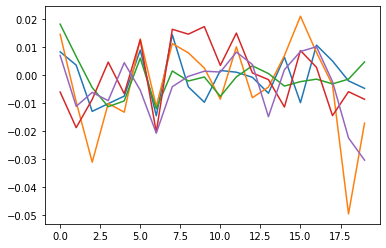

In [97]:
train_original.INDUSTRY.value_counts()
sub_data = train_original.loc[train_original.INDUSTRY == 2]

DATE_ = 0

for sub_group in sub_data.SUB_INDUSTRY.unique()[:10]:
    data = sub_data.loc[(sub_data.DATE == DATE_) & (sub_data.SUB_INDUSTRY == sub_group)]
    data = data.groupby(["DATE","SUB_INDUSTRY"])[ret_cols].mean()
    
    data = data.values[0]

    plt.plot(data)
    # display(sub_data_loop)
    # first_stock = sub_data_loop.iloc[0]
    # second_stock = sub_data_loop.iloc[1]


    # x = list(range(0,len(first_stock)))

    # fig, ax_left = plt.subplots()
    # ax_left.plot(x, first_stock, label='first_stock', color='blue')
    # ax_left.set_ylabel('first_stock')

    # ax_righ1 = ax_left.twinx()
    # ax_righ1.plot(x, second_stock, label='second_stock', color='red')
    # ax_righ1.set_ylabel('second_stock')

plt.show()


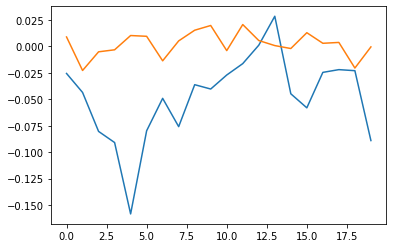

In [149]:
train_original.SECTOR.value_counts()
# sub_data = train_original.loc[train_original.SECTOR == 2]
sub_data = train_original

DATE_ = 1


yeet = []

# for sub_group in sub_data.SECTOR.unique():
#     data = sub_data.loc[(sub_data.DATE == DATE_) & (sub_data.INDUSTRY == sub_group)]
#     data = data.groupby(["DATE","SECTOR"])[volume_cols].mean()
    
#     data = data.values[0]
#     yeet.append(data)
#     plt.plot(data)

#     # display(sub_data_loop)
#     # first_stock = sub_data_loop.iloc[0]
#     # second_stock = sub_data_loop.iloc[1]


#     # x = list(range(0,len(first_stock)))

#     # fig, ax_left = plt.subplots()
#     # ax_left.plot(x, first_stock, label='first_stock', color='blue')
#     # ax_left.set_ylabel('first_stock')

#     # ax_righ1 = ax_left.twinx()
#     # ax_righ1.plot(x, second_stock, label='second_stock', color='red')
#     # ax_righ1.set_ylabel('second_stock')

# plt.show()



data = x_train.groupby(["DATE"])[volume_cols].mean()
plt.plot(data.values[0])

data = x_train.groupby(["DATE"])[ret_cols].mean()
plt.plot(data.values[0])

plt.show()


# for sub_group in sub_data.SECTOR.unique():
#     data = sub_data.loc[(sub_data.DATE == DATE_) & (sub_data.INDUSTRY == sub_group)]
#     data = data.groupby(["DATE","SECTOR"])[ret_cols].mean()
    
#     data = data.values[0]
#     yeet.append(data)
#     plt.plot(data)

#     # display(sub_data_loop)
#     # first_stock = sub_data_loop.iloc[0]
#     # second_stock = sub_data_loop.iloc[1]


#     # x = list(range(0,len(first_stock)))

#     # fig, ax_left = plt.subplots()
#     # ax_left.plot(x, first_stock, label='first_stock', color='blue')
#     # ax_left.set_ylabel('first_stock')

#     # ax_righ1 = ax_left.twinx()
#     # ax_righ1.plot(x, second_stock, label='second_stock', color='red')
#     # ax_righ1.set_ylabel('second_stock')

# plt.show()





In [141]:
x_train.groupby(["DATE","SECTOR"])[ret_cols].mean()

RET_1     RET_2     RET_3     RET_4     RET_5     RET_6  \
DATE SECTOR                                                               
0    0       0.010890 -0.023784 -0.005418 -0.009770  0.015471  0.007394   
     1       0.017253  0.001304 -0.014219 -0.009237 -0.009513  0.007011   
     2       0.009808 -0.010538 -0.002820 -0.005874 -0.001850  0.007600   
     3       0.009178 -0.017313 -0.000148 -0.000655  0.005187  0.009070   
     4       0.006583 -0.019908 -0.001972 -0.005189  0.011200  0.008367   
...               ...       ...       ...       ...       ...       ...   
223  6       0.013674 -0.013359  0.002308  0.012510 -0.005306 -0.003805   
     7       0.010474 -0.004570  0.006999  0.014140 -0.001464  0.002577   
     8       0.029020  0.005772  0.007092  0.021922  0.000553 -0.001399   
     9       0.021544 -0.014448  0.000583  0.015211  0.008953 -0.005318   
     10      0.006171 -0.003208  0.007804  0.010853 -0.004806  0.001907   

                RET_7     RET_8     RET_9    RET_10    RET_11    RET_12  \
DATE SECTOR                                                               
0    0      -0.016943  0.014374  0.021710  0.017001 -0.004292  0.026720   
     1      -0.020589  0.013453  0.002579 -0.007857 -0.001983  0.006413   
     2      -0.017672 -0.001430  0.009858  0.018027 -0.005587  0.017874   
     3      -0.011565  0.002512  0.016204  0.015724 -0.006796  0.018511   
     4      -0.013838 -0.000770  0.014245  0.020996 -0.003779  0.016754   
...               ...       ...       ...       ...       ...       ...   
223  6      -0.005589 -0.000177  0.002512 -0.011973  0.006570  0.022554   
     7      -0.004330 -0.000598  0.006707  0.001518 -0.002206  0.015157   
     8      -0.010994 -0.015376  0.012327 -0.009421  0.002417  0.036258   
     9      -0.010693  0.002279  0.000543  0.044354 -0.009795  0.013640   
     10      0.000657  0.003141 -0.003101  0.009576 -0.006220  0.005348   

               RET_13    RET_14    RET_15    RET_16    RET_17    RET_18  \
DATE SECTOR                                                               
0    0       0.007819  0.013454 -0.000304  0.011598  0.003938  0.002792   
     1      -0.000650 -0.005375  0.002878 -0.004348  0.010472  0.001604   
     2       0.002357 -0.002135 -0.004226  0.013449 -0.000256  0.009661   
     3       0.003720 -0.001545  0.000463  0.014950 -0.001046  0.002092   
     4       0.004439  0.001715 -0.001918  0.012885  0.002417  0.004968   
...               ...       ...       ...       ...       ...       ...   
223  6       0.008270 -0.009909  0.006019  0.011106 -0.005660  0.022714   
     7       0.014175 -0.009370 -0.000342  0.000376 -0.005766  0.009678   
     8       0.007614 -0.017286 -0.011035 -0.000150 -0.004121  0.016825   
     9       0.011141 -0.000540 -0.006297  0.011606 -0.008539  0.017380   
     10      0.014689 -0.002383  0.004282  0.007540 -0.011823  0.014072   

               RET_19    RET_20  
DATE SECTOR                      
0    0      -0.028057 -0.002509  
     1      -0.011181 -0.010228  
     2      -0.023426 -0.001261  
     3      -0.018305  0.000316  
     4      -0.015464 -0.002011  
...               ...       ...  
223  6      -0.023980  0.014906  
     7      -0.018813  0.011758  
     8      -0.032898  0.014216  
     9      -0.032050  0.014697  
     10     -0.015464  0.015073  

[1740 rows x 20 columns]

Text(0, 0.5, 'data')

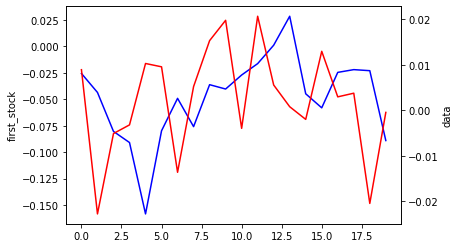

In [174]:


data = x_train.groupby(["DATE"])[volume_cols].mean()

x = list(range(0,len(data.values[0])-0))

data = list(data.values[0])

fig, ax_left = plt.subplots()
ax_left.plot(x, data[0:], label='first_stock', color='blue')
ax_left.set_ylabel('first_stock')


data = x_train.groupby(["DATE"])[ret_cols].mean()
data = list(data.values[0])

ax_right = ax_left.twinx()
ax_right.plot(x, data, label='data', color='red')
ax_right.set_ylabel('data')




In [165]:
list(data)

[0.00891462992498035,
 -0.022789638988461598,
 -0.005120115598845211,
 -0.0032183554758299852,
 0.010277627206749079,
 0.009545909625269022,
 -0.013641954229225442,
 0.005203152550486603,
 0.015300871282708108,
 0.019768555955223123,
 -0.003982673972994853,
 0.02066249536181565,
 0.00554726735732627,
 0.0007740409303052396,
 -0.002009417320589966,
 0.012954303571346403,
 0.002942928167463122,
 0.0037472303554403432,
 -0.02048114761649735,
 -0.000475794450905654]